In [16]:
import pandas as pd
import seaborn as sns

In [5]:
df = pd.read_csv('provincialRadiations.csv')
df

,city,province,Total (mSv/y),Cosmic radiation (mSv/y),Terrestrial background (mSv/y),Annual inhalation dose (mSv/y),Radionuclides in the body (mSv/y)
0,Vancouver,BC,1.3,0.5,0.1,0.4,0.3
1,Toronto,ON,1.6,0.4,0.2,0.8,0.3
2,Québec City,QC,1.6,0.4,0.2,0.7,0.3
3,Montreal,QC,1.6,0.4,0.3,0.7,0.3
4,St-John's,NL,1.6,0.4,0.2,0.7,0.3
5,CANADA,-,1.8,0.3,0.2,0.9,0.3
6,Victoria,BC,1.8,0.5,0.1,0.9,0.3
7,Ottawa,ON,1.8,0.4,0.2,0.9,0.3
8,Fredericton,NB,1.8,0.3,0.3,0.9,0.3
9,Charlottetown,PE,1.8,0.3,0.2,0.9,0.3


In [6]:
print ('Dropping duplicate rows for a province, selecting worst case radiation cities')
df = df.drop([0, 1, 2, 5]).reset_index(drop=True)
df

Dropping duplicate rows for a province, selecting worst case radiation cities


,city,province,Total (mSv/y),Cosmic radiation (mSv/y),Terrestrial background (mSv/y),Annual inhalation dose (mSv/y),Radionuclides in the body (mSv/y)
0,Montreal,QC,1.6,0.4,0.3,0.7,0.3
1,St-John's,NL,1.6,0.4,0.2,0.7,0.3
2,Victoria,BC,1.8,0.5,0.1,0.9,0.3
3,Ottawa,ON,1.8,0.4,0.2,0.9,0.3
4,Fredericton,NB,1.8,0.3,0.3,0.9,0.3
5,Charlottetown,PE,1.8,0.3,0.2,0.9,0.3
6,Whitehorse,YT,1.9,0.5,0.2,0.9,0.3
7,Iqualuit,NU,1.9,0.5,0.2,0.9,0.3
8,Edmonton,AB,2.4,0.5,0.3,1.3,0.3
9,Halifax,NS,2.5,0.3,0.3,1.5,0.3


In [10]:
allProvinces = [ 'AB', 'BC', 'MB', 'NB', 'NL', 'NS', 'NT', 'NU', 'ON', 'PE', 'QC', 'SK', 'YT'
               ]
print (set(df['province']) - set(allProvinces))
print (set(allProvinces) - set(df['province']))

set()
set()


In [50]:
df = df[ ['province', 'Total (mSv/y)' ] ]
df['Total (Sv/y)'] = df['Total (mSv/y)'] * 0.001
df['Total'] = df['Total (Sv/y)']
df

,province,Total (mSv/y),Total (Sv/y),Total
0,QC,1.6,0.0016,0.0016
1,NL,1.6,0.0016,0.0016
2,BC,1.8,0.0018,0.0018
3,ON,1.8,0.0018,0.0018
4,NB,1.8,0.0018,0.0018
5,PE,1.8,0.0018,0.0018
6,YT,1.9,0.0019,0.0019
7,NU,1.9,0.0019,0.0019
8,AB,2.4,0.0024,0.0024
9,NS,2.5,0.0025,0.0025


In [15]:
df = df.sort_values(['Total (mSv/y)'])
df

,province,Total (mSv/y),Total (Sv/y)
0,QC,1.6,0.0016
1,NL,1.6,0.0016
2,BC,1.8,0.0018
3,ON,1.8,0.0018
4,NB,1.8,0.0018
5,PE,1.8,0.0018
6,YT,1.9,0.0019
7,NU,1.9,0.0019
8,AB,2.4,0.0024
9,NS,2.5,0.0025


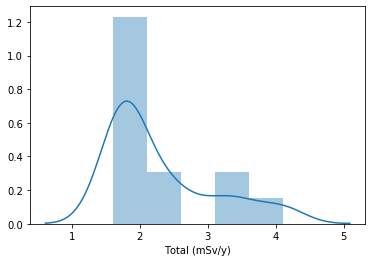

In [17]:
sns.distplot(df['Total (mSv/y)'])

In [104]:
provRads = df.copy()
provRads = provRads[['province', 'Total']]
provRads.columns = ['province', 'svPerYear']
provRads

,province,svPerYear
0,QC,0.0016
1,NL,0.0016
2,BC,0.0018
3,ON,0.0018
4,NB,0.0018
5,PE,0.0018
6,YT,0.0019
7,NU,0.0019
8,AB,0.0024
9,NS,0.0025


# Try color scaling according to numbers
https://www.oreilly.com/library/view/python-cookbook/0596001673/ch09s11.html

In [19]:
import math

def floatRgb(mag, cmin, cmax):
    """ Return a tuple of floats between 0 and 1 for R, G, and B. """
    # Normalize to 0-1
    try: x = float(mag-cmin)/(cmax-cmin)
    except ZeroDivisionError: x = 0.5 # cmax == cmin
    blue  = min((max((4*(0.75-x), 0.)), 1.))
    red   = min((max((4*(x-0.25), 0.)), 1.))
    green = min((max((4*math.fabs(x-0.5)-1., 0.)), 1.))
    return red, green, blue

def rgb(mag, cmin, cmax):
    """ Return a tuple of integers, as used in AWT/Java plots. """
    red, green, blue = floatRgb(mag, cmin, cmax)
    return int(red*255), int(green*255), int(blue*255)

def strRgb(mag, cmin, cmax):
    """ Return a hex string, as used in Tk plots. """
    return "#%02x%02x%02x" % rgb(mag, cmin, cmax)

# Colors experiments
1. https://jakevdp.github.io/PythonDataScienceHandbook/04.07-customizing-colorbars.html
2. https://stackoverflow.com/questions/15140072/how-to-map-number-to-color-using-matplotlibs-colormap

In [78]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived grayscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
        
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)
    

def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
#     cmap = grayscale_cmap(cmap)
#     grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
#     ax[1].imshow([grayscale], extent=[0, 10, 0, 1])
    
    return cmap, colors
#     return cmap, colors, grayscale

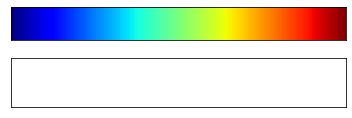

In [79]:
# cmap, colors, grayscale = view_colormap('jet')
cmap, colors = view_colormap('jet')

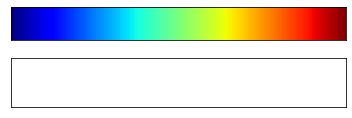

In [80]:
fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow([colors], extent=[0, 20, 5, 7])
# ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

In [58]:
len(colors), colors

(256, array([[0.        , 0.        , 0.5       , 1.        ],
        [0.        , 0.        , 0.51782531, 1.        ],
        [0.        , 0.        , 0.53565062, 1.        ],
        ...,
        [0.53565062, 0.        , 0.        , 1.        ],
        [0.51782531, 0.        , 0.        , 1.        ],
        [0.5       , 0.        , 0.        , 1.        ]]))

In [93]:
import matplotlib as mpl

norm = mpl.colors.Normalize(vmin=0, vmax=100)
radToColorMapper = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
print (radToColorMapper.to_rgba(0.5))

(0.0, 0.0, 0.517825311942959, 1.0)


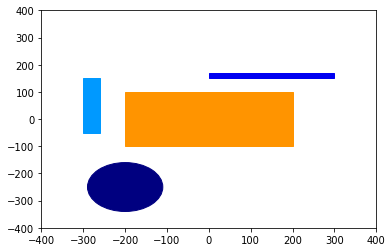

In [98]:

fig = plt.figure()
ax = fig.add_subplot(111)
rect1 = mpl.patches.Rectangle((-200,-100), 400, 200, color=radToColorMapper.to_rgba(75))
rect2 = mpl.patches.Rectangle((0,150), 300, 20, color=radToColorMapper.to_rgba(10))
rect3 = mpl.patches.Rectangle((-300,-50), 40, 200, color='#0099FF')
circle1 = mpl.patches.Circle((-200,-250), radius=90, color=radToColorMapper.to_rgba(0.03))
ax.add_patch(rect1)
ax.add_patch(rect2)
ax.add_patch(rect3)
ax.add_patch(circle1)
plt.xlim([-400, 400])
plt.ylim([-400, 400])
plt.show()

# Chew on the activities / jobs / entities radiation values, compare them to 
1. provincial background radiation
2. dangerous amounts of radiation to compare to for e.g. compare to how much closer are you to increasing your risk of cancer OR have you gotten a head CT yet?

In [145]:
actRads = pd.read_csv('activityRadiations.csv')
actRads = actRads[['activity', 'svPerYear']]
# actRads.columns = ['activity', 'svPerYear']
actRads.svPerYear = actRads.svPerYear.astype(float)

dangRads = actRads.iloc[37:,].reset_index(drop=True)
occRads = actRads.iloc[0:2,].reset_index(drop=True)

actRads = actRads.drop([0, 1])
actRads = actRads.drop([37, 38])
actRads = actRads.reset_index(drop=True)



In [146]:
dangRads

,activity,svPerYear
0,Lowest one-year dose clearly linked to increas...,0.1
1,Fatal radiation poisoning,4.0


In [147]:
actRads

,activity,svPerYear
0,banana,3.650000e-05
1,carrots,7.300000e-05
2,potatoes,9.125000e-05
3,lima beans,1.825000e-04
4,red meat,1.825000e-05
5,brazil nuts,9.125000e-06
6,Living within 50 miles of nuclear power plant,9.000000e-08
7,Sleeping next to someone,5.000000e-08
8,Arm x- ray,1.000000e-06
9,CRT monitor FOR a year,1.000000e-06


In [148]:
occRads

,activity,svPerYear
0,Astronauts,0.50
1,Radiology techniicial,0.05


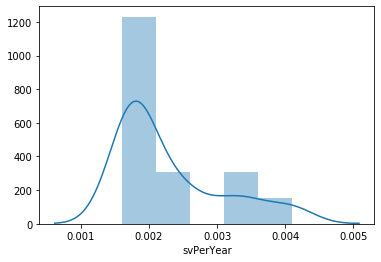

In [149]:
sns.distplot(provRads['svPerYear'])

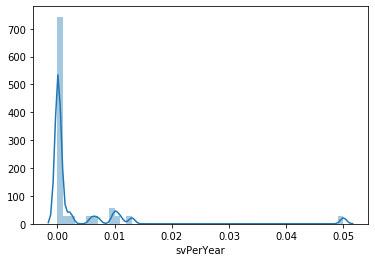

In [150]:
sns.distplot(actRads['svPerYear'])

In [152]:
import statistics
print (statistics.median(actRads['svPerYear']))
print (min(actRads['svPerYear']), max(actRads['svPerYear']), np.mean(actRads['svPerYear']))

0.00011
5e-08 0.05 0.003273721857142857


In [158]:
print ('Number of activities youll have to repeat to achieve 0.1 min dosage to increase cancer risk per year, where the activity radiation has also already been calculated if you repeat them over the year')
print ('At an average of ', np.mean(actRads['svPerYear']), ' per activity')
print ('0.1 sv / average per activity ', 0.1 / ( np.mean(actRads['svPerYear'])))

Number of activities youll have to repeat to achieve 0.1 min dosage to increase cancer risk per year, where the activity radiation has also already been calculated if you repeat them over the year
At an average of  0.003273721857142857  per activity
0.1 sv / average per activity  30.546272519093932


# Formatting for ascii plots

In [163]:
('long_label', 423)
s = ""
for idx, row in provRads.iterrows():
    s += "('" + row['province'].strip() + "', " + str(np.round(row['svPerYear'], 5)).strip() + ")"
    s += ", "
    
print (s)

('QC', 0.0016), ('NL', 0.0016), ('BC', 0.0018), ('ON', 0.0018), ('NB', 0.0018), ('PE', 0.0018), ('YT', 0.0019), ('NU', 0.0019), ('AB', 0.0024), ('NS', 0.0025), ('NT', 0.0031), ('SK', 0.0035), ('MB', 0.0041), 


In [164]:
from ascii_graph import Pyasciigraph

test = [('long_label', 423), ('sl', 1234), ('line3', 531),
    ('line4', 200), ('line5', 834)]

graph = Pyasciigraph()
for line in  graph.graph('test print', test):
    print(line)


test print
###############################################################################
████████████████████                                            423  long_label
█████████████████████████████████████████████████████████████  1234  sl        
██████████████████████████                                      531  line3     
█████████                                                       200  line4     
█████████████████████████████████████████                       834  line5     


In [167]:
s = ""
for idx, row in occRads.iterrows():
    s += "('" + row['activity'].strip() + "', " + str(np.round(row['svPerYear'], 5)).strip() + ")"
    s += ", "
    
print (s)

('Astronauts', 0.5), ('Radiology techniicial', 0.05), 


In [182]:
from ascii_graph import Pyasciigraph
  

# show plot for relative background radiations of each province
provRads = [ ('QC', 0.0016), ('NL', 0.0016), ('BC', 0.0018), ('ON', 0.0018), ('NB', 0.0018), ('PE', 0.0018), ('YT', 0.0019),
        ('NU', 0.0019), ('AB', 0.0024), ('NS', 0.0025), ('NT', 0.0031), ('SK', 0.0035), ('MB', 0.0041)
]
provRadsBar = Pyasciigraph(float_format='{:,.5f}')
for line in  provRadsBar.graph('Background radiations of every province', provRads):
    print(line)

print ('\n\n')
    
# show plot for relative radiations of each occupation
occRads = [ ('Farmer', 0.00011), ('Dentist', 0.005), ('Pilot', 0.05), ('Astronaut', 0.5) ]
occRadsBar = Pyasciigraph(float_format='{:,.5f}')
for line in  occRadsBar.graph('Radiations exposure from every occupation', occRads):
    print(line)
    
print ('\n\n')


# show plot for relative radiations of each activity
actRads = [ ('Eating banana / red meat / carrots', 0.0001825), ('Sleeping next to someone', 5e-08), 
           ('Watch TV', 1.000000e-05), 
           ('Smoking cigarettes', 0.013), ('Using natural gas at home', 9e-05), 
           ('Using soaps / shampoos / other consumer products', 0.011)
            ]
actRadsBar = Pyasciigraph(float_format='{:,.8f}')
for line in  actRadsBar.graph('Radiations exposure from every activity', actRads):
    print(line)
    

print ('\n\n')


# show plot for total radiations you have accumulated compared to increasing risk of cancer
totalRadSuffered = [ ("You've suffered", 0.05), ("Death by cancer :p", 0.1) ]
totalRadSufferedBar = Pyasciigraph(float_format='{:,.2f}')
for line in  totalRadSufferedBar.graph('Do you have health? How much did you suffer? (in Sv)', totalRadSuffered):
    print(line)
    
print ('\n\n')

    
# show plot for total money you have earned compared to your goal (maybe a number pulled for ideal happiness)
money = [ ("You've earned", 25000), ("But you need this much to be happy :(", 50000) ]
moneyBar = Pyasciigraph(float_format='{:,.2f}')
for line in  moneyBar.graph('Are you (monetarily) happy? Do you have wealth? (in CAD)', money):
    print(line)



Background radiations of every province
###############################################################################
█████████████████████████                                           0.00160  QC
█████████████████████████                                           0.00160  NL
████████████████████████████                                        0.00180  BC
████████████████████████████                                        0.00180  ON
████████████████████████████                                        0.00180  NB
████████████████████████████                                        0.00180  PE
██████████████████████████████                                      0.00190  YT
██████████████████████████████                                      0.00190  NU
██████████████████████████████████████                              0.00240  AB
████████████████████████████████████████                            0.00250  NS
█████████████████████████████████████████████████                   0.00310  NT


In [169]:
s = ""
for idx, row in actRads.iterrows():
    s += "('" + row['activity'].strip() + "', " + str(np.round(row['svPerYear'], 9)).strip() + ")"
    s += ", "
    
print (s)

('banana', 3.65e-05), ('carrots', 7.3e-05), ('potatoes', 9.125e-05), ('lima beans', 0.0001825), ('red meat', 1.825e-05), ('brazil nuts', 9.125e-06), ('Living within 50 miles of nuclear power plant', 9e-08), ('Sleeping next to someone', 5e-08), ('Arm x- ray', 1e-06), ('CRT monitor FOR a year', 1e-06), ('Dental x-ray', 5e-06), ('Chest x-ray', 2e-05), ('Living in stone / brick / conrecte bulding for year', 7e-05), ('Yearly dose from natural potassium in body', 0.00039), ('ePA yearly release limit for a nuclear power plant', 0.00025), ('Mammogram', 0.0004), ('Head CT Scan', 0.002), ('Chest CT scan', 0.007), ('Radiation worker dose limit', 0.05), ('Television', 1e-05), ('Drinking water', 5e-05), ('Natural gas', 9e-05), ('Consumer products', 0.011), ('Soil', 0.00011), ('Plane. Transcontiental flight', 0.00018), ('Cigarette smoking', 0.013), ('Dental work using ceramincs', 0.01), ('Whole body CT', 0.01), ('Radon in average US home / year', 0.00228), ('Cosmic radiation living at sea level', 0.

In [165]:
help(Pyasciigraph)

Help on class Pyasciigraph in module ascii_graph:

class Pyasciigraph(builtins.object)
 |  Pyasciigraph(line_length=79, min_graph_length=50, separator_length=2, force_max_value=None, graphsymbol=None, multivalue=True, human_readable=None, float_format='{0:.0f}', titlebar='#')
 |  
 |  Methods defined here:
 |  
 |  __init__(self, line_length=79, min_graph_length=50, separator_length=2, force_max_value=None, graphsymbol=None, multivalue=True, human_readable=None, float_format='{0:.0f}', titlebar='#')
 |      Constructor of Pyasciigraph
 |      
 |      :param line_length: the max number of char on a line
 |        if any line cannot be shorter,
 |        it will go over this limit.
 |        Default: 79
 |      :type line_length: int
 |      :param min_graph_length: the min number of char
 |        used by the graph itself.
 |        Default: 50
 |      :type min_graph_length: int
 |      :param force_max_value: if provided, force a max value in order to graph
 |        each line with r

In [199]:
ship1 = """
              |    |    |
             )_)  )_)  )_)
            )___))___))___)\\
           )____)____)_____)\\
         _____|____|____|____\\\__
---------\                   /---------
  ^^^^^ ^^^^^^^^^^^^^^^^^^^^^
    ^^^^      ^^^^     ^^^    ^^
         ^^^^      ^^^

"""

ship2 = """
                              |    |    |
                             )_)  )_)  )_)
                            )___))___))___)\\
                           )____)____)_____)\\
                         _____|____|____|____\\\__
                ---------\                   /---------
                  ^^^^^ ^^^^^^^^^^^^^^^^^^^^^
                    ^^^^      ^^^^     ^^^    ^^
                         ^^^^      ^^^

"""
icebergShip = """
           
                                      |    |    |              ,----....____            
                                     )_)  )_)  )_)             (             ````----....___   
                                    )___))___))___)\              \                            `````
                                   )____)____)_____)\               \                               \        
                                 _____|____|____|____\\__                \                               \       
                        ---------\                   /---------              )`.\  )`.   )`.   )`.   )`.   )`.  \ )`.   
                          ^^^^^ ^^^^^^^^^^^^^^^^^^^^^            -'   `-'   `-'   `-'   `-'   `-'   `-'   `-'
                            ^^^^      ^^^^     ^^^    ^^            
                                 ^^^^      ^^^                  
"""


#                                                          _.-^^---....,,--       
#                                                      _--                  --_  
#                                                     <                        >)
#                                                     |                         | 
#                                                      \._                   _./  
#                                                         ```--. . , ; .--'''       
#                                                               | |   |             
#                                                            .-=||  | |=-.   
#                                                            `-=#$%&%$#=-'   
#                                                               | ;  :|     
#                                                      _____.,-#%&$@%#&#~,._____

import time
import os

print (ship1)
time.sleep(1)
os.system('clear');
print (ship2)
os.system('clear');
time.sleep(1)
os.system('clear');
print (icebergShip)


              |    |    |
             )_)  )_)  )_)
            )___))___))___)\
           )____)____)_____)\
         _____|____|____|____\\__
---------\                   /---------
  ^^^^^ ^^^^^^^^^^^^^^^^^^^^^
    ^^^^      ^^^^     ^^^    ^^
         ^^^^      ^^^



                              |    |    |
                             )_)  )_)  )_)
                            )___))___))___)\
                           )____)____)_____)\
                         _____|____|____|____\\__
                ---------\                   /---------
                  ^^^^^ ^^^^^^^^^^^^^^^^^^^^^
                    ^^^^      ^^^^     ^^^    ^^
                         ^^^^      ^^^



           
                                      |    |    |              ,----....____            
                                     )_)  )_)  )_)             (             ````----....___   
                                    )___))___))___)\              \                            `````
       

In [191]:
ship = """
                  |    |    |
                 )_)  )_)  )_)
                )___))___))___)\\
               )____)____)_____)\\
             _____|____|____|____\\\__
    ---------\                   /---------
      ^^^^^ ^^^^^^^^^^^^^^^^^^^^^
        ^^^^      ^^^^     ^^^    ^^
             ^^^^      ^^^

"""
iceberg = """
  ,----....____            
 (             ````----....___   
  \                            `````
   \                               \        
    \                               \       
  )`.\  )`.   )`.   )`.   )`.   )`.  \ )`.   
-'   `-'   `-'   `-'   `-'   `-'   `-'   `-'

"""

In [195]:
for i, j in zip(ship.split('\n'), iceberg.split('\n')):
    print (i + ' '*12 + j)

            
                  |    |    |              ,----....____            
                 )_)  )_)  )_)             (             ````----....___   
                )___))___))___)\              \                            `````
               )____)____)_____)\               \                               \        
             _____|____|____|____\\__                \                               \       
    ---------\                   /---------              )`.\  )`.   )`.   )`.   )`.   )`.  \ )`.   
      ^^^^^ ^^^^^^^^^^^^^^^^^^^^^            -'   `-'   `-'   `-'   `-'   `-'   `-'   `-'
        ^^^^      ^^^^     ^^^    ^^            
             ^^^^      ^^^            


In [ ]:
                                                                    Hi, welcome to RadExpo!

                                                                        Travel from province to province to earn money. 

                                                                                Beware! 
                                                                    Survival activities are endangered by harmful radiations. 

                                                                        Earn Money. Have fun. But Survive :)


In [306]:
suitcase = """
                    ____
               .---[[__]]----.
              ;-------------.|       ____
              |             ||   .--[[__]]---.
              |             ||  ;-----------.|
              |             ||  |           ||
              |_____________|/  |           ||
                                |___________|/

"""
sadFace = """
     .-""""""-.
   .'          '.
  /   O      O   \
 :           `    :
 |                |   
 :    .------.    :
  \  '        '  /
   '.          .'
     '-......-'
"""

suitcaseSmall = """    


       ____
   .--[[__]]---.
  ;-----------.|
  |           ||
  |           ||
  |___________|/
"""
manRunning = """
              \\\\\\\\
              \c .(
               \ _/
            ___/(  /(
           /--/ \\//
       __ )/ /\/ \/
      `-.\  //\\
         \\//  \\
          \/    \\
                 \\
                 '--`
"""
manRunning = """

              \\\\\\\\
              \c .(
               \ _/
            ___/(  /(
           /--/ \\//
       __ )/ /\/ \/
      `-.\  //\\
         \\//  \\
          \/    \\
                 \\
                 '--`
"""

In [295]:
print (manRunning)








              \\\\
              \c .(
               \ _/
            ___/(  /(
           /--/ \//
       __ )/ /\/ \/
      `-.\  //\
         \//  \
          \/    \
                 \
                 '--`



In [325]:
radHaz = """
                         __    _                                   
                    _wr""        "-q__                             
                 _dP                 9m_     
               _#P                     9#_                         
              d#@                       9#m                        
             d##                         ###                       
            J###                         ###L                      
            {###K                       J###K                      
            ]####K      ___aaa___      J####F                      
        __gmM######_  w#P""   ""9#m  _d#####Mmw__                  
     _g##############mZ_         __g##############m_               
   _d####M@PPPP@@M#######Mmp gm#########@@PPP9@M####m_             
  a###""          ,Z"#####@" '######"\g          ""M##m            
 J#@"             0L  "*##     ##@"  J#              *#K           
 #"               `#    "_gmwgm_~    dF               `#_          
7F                 "#_   ]#####F   _dK                 JE          
]                    *m__ ##### __g@"                   F          
                       "PJ#####LP"                                 
 `                       0######_                      '           
                       _0########_                                   
     .               _d#####^#####m__              ,              
      "*w_________am#####P"   ~9#####mw_________w*"                  
          ""9@#####@M""           ""P@#####@M""                    

"""
hapLife = """
  _    _          _____  _______     __ 
 | |  | |   /\   |  __ \|  __ \ \   / / 
 | |__| |  /  \  | |__) | |__) \ \_/ /  
 |  __  | / /\ \ |  ___/|  ___/ \   /   
 | |  | |/ ____ \| |    | |      | |    
 |_|  |_/_/  __\_\_|____|_|_____ |_|    
     | |    |_   _|  ____|  ____|       
     | |      | | | |__  | |__          
     | |      | | |  __| |  __|         
     | |____ _| |_| |    | |____        
     |______|_____|_|    |______|       
                                        
                                        
"""
fireWorks = """
                                   .''.       
       .''.      .        *''*    :_\/_:     . 
      :_\/_:   _\(/_  .:.*_\/_*   : /\ :  .'.:.'.
  .''.: /\ :   ./)\   ':'* /\ * :  '..'.  -=:o:=-
 :_\/_:'.:::.    ' *''*    * '.\'/.' _\(/_'.':'.'
 : /\ : :::::     *_\/_*     -= o =-  /)\    '  *
  '..'  ':::'     * /\ *     .'/.\'.   '
      *            *..*         :
        *
        *
"""

# radHaz = """
#                    _   _
#                  .-_; ;_-.
#                 / /     \ \\
#                | |       | |
#                 \ \.---./ /
#             .-"~   .---.   ~"-.
#           ,`.-~/ .'`---`'. \~-.`,
#           '`   | | \(_)/ | |   `'
#           ,    \  \ | | /  /    ,
#           ;`'.,_\  `-'-'  /_,.'`;
#            '-._  _.-'^'-._  _.-'
#                ``         ``  
# """
print (fireWorks)


                                   .''.       
       .''.      .        *''*    :_\/_:     . 
      :_\/_:   _\(/_  .:.*_\/_*   : /\ :  .'.:.'.
  .''.: /\ :   ./)\   ':'* /\ * :  '..'.  -=:o:=-
 :_\/_:'.:::.    ' *''*    * '.'/.' _\(/_'.':'.'
 : /\ : :::::     *_\/_*     -= o =-  /)\    '  *
  '..'  ':::'     * /\ *     .'/.'.   '
      *            *..*         :
        *
        *



In [317]:
print (fireWorks)
for i, j in zip(manRunning.split('\n'), hapLife.split('\n')):
    noSpaces = 40 - len(i)
    print (i + " "*noSpaces + j)
    
stopped = len(hapLife.split('\n'))
for i in manRunning.split('\n')[stopped:]:
    print (" "*noSpaces + i)


                                                   .''.       
                       .''.      .        *''*    :_\/_:     . 
                      :_\/_:   _\(/_  .:.*_\/_*   : /\ :  .'.:.'.
                  .''.: /\ :   ./)\   ':'* /\ * :  '..'.  -=:o:=-
                 :_\/_:'.:::.    ' *''*    * '.'/.' _\(/_'.':'.'
                 : /\ : :::::     *_\/_*     -= o =-  /)\    '  *
                  '..'  ':::'     * /\ *     .'/.'.   '
                      *            *..*         :
                        *
                        *

                                        
                                          _    _          _____  _______     __ 
              \\\\                       | |  | |   /\   |  __ \|  __ \ \   / / 
              \c .(                      | |__| |  /  \  | |__) | |__) \ \_/ /  
               \ _/                      |  __  | / /\ \ |  ___/|  ___/ \   /   
            ___/(  /(                    | |  | |/ ____ \| |    | |      | |    
    

In [359]:

manRunning = """







              \\\\\\\\
              \c .(
               \ _/
            ___/(  /(
           /--/ \\//
       __ )/ /\/ \/
      `-.\  //\\
         \\//  \\
          \/    \\
                 \\
                 '--`
"""
radHaz = """
                         __    _                                   
                    _wr""        "-q__                             
                 _dP                 9m_     
               _#P                     9#_                         
              d#@                       9#m                        
             d##                         ###                       
            J###                         ###L                      
            {###K                       J###K                      
            ]####K      ___aaa___      J####F                      
        __gmM######_  w#P""   ""9#m  _d#####Mmw__                  
     _g##############mZ_         __g##############m_               
   _d####M@PPPP@@M#######Mmp gm#########@@PPP9@M####m_             
  a###""          ,Z"#####@" '######"\g          ""M##m            
 J#@"             0L  "*##     ##@"  J#              *#K           
 #"               `#    "_gmwgm_~    dF               `#_          
7F                 "#_   ]#####F   _dK                 JE          
]                    *m__ ##### __g@"                   F          
                       "PJ#####LP"                                 
 `                       0######_                      '           
                       _0########_                                   
     .               _d#####^#####m__              ,              
      "*w_________am#####P"   ~9#####mw_________w*"                  
          ""9@#####@M""           ""P@#####@M""                    

"""
for i, j in zip(radHaz.split('\n'), manRunning.split('\n')):
    noSpaces = 30 - len(i)
    print (i + " "*noSpaces + j)
#     print (i + " "*30 + j)
stopped = len(manRunning.split('\n'))
for i in radHaz.split('\n')[stopped:]:
    print (" "*noSpaces + i)

                              
                         __    _                                   
                    _wr""        "-q__                             
                 _dP                 9m_     
               _#P                     9#_                         
              d#@                       9#m                        
             d##                         ###                       
            J###                         ###L                      
            {###K                       J###K                                    \\\\
            ]####K      ___aaa___      J####F                                    \c .(
        __gmM######_  w#P""   ""9#m  _d#####Mmw__                                 \ _/
     _g##############mZ_         __g##############m_                           ___/(  /(
   _d####M@PPPP@@M#######Mmp gm#########@@PPP9@M####m_                        /--/ \//
  a###""          ,Z"#####@" '######"\g          ""M##m                   __ )/

In [287]:

for i, j in zip(radHaz.split('\n'), manRunning.split('\n')):
    noSpaces = 30 - len(i)
    print (i + " "*noSpaces + j)
#     print (i + " "*30 + j)


# stopped = len(suitcaseSmall.split('\n'))
# for i in manRunning.split('\n')[stopped:]:
#     print (" "*noSpaces + i)

                              
                   _   _                    \\\\
                 .-_; ;_-.                  \c .(
                / /     \ \                  \ _/
               | |       | |              ___/(  /(
                \ \.---./ /              /--/ \//
            .-"~   .---.   ~"-.       __ )/ /\/ \/
          ,`.-~/ .'`---`'. \~-.`,      `-.\  //\
          '`   | | \(_)/ | |   `'         \//  \
          ,    \  \ | | /  /    ,          \/    \
          ;`'.,_\  `-'-'  /_,.'`;                 \
           '-._  _.-'^'-._  _.-'                 '--`
               ``         ``  


In [259]:

for i, j in zip(suitcaseSmall.split('\n'), manRunning.split('\n')):
    noSpaces = 15 - len(i)
    print (i + " "*noSpaces + j)
    
stopped = len(suitcaseSmall.split('\n'))
for i in manRunning.split('\n')[stopped:]:
    print (" "*noSpaces + i)

               
                             \\\\
                             \c .(
       ____                   \ _/
   .--[[__]]---.            ___/(  /(
  ;-----------.|           /--/ \//
  |           ||       __ )/ /\/ \/
  |           ||      `-.\  //\
  |___________|/         \//  \
                         \/    \
                                \
                                '--`
               


In [263]:

for i, j in zip(manRunning.split('\n'), suitcaseSmall.split('\n')):
    noSpaces = 21 - len(i)
    print (i + " "*noSpaces + j)
    
stopped = len(suitcaseSmall.split('\n'))
for i in manRunning.split('\n')[stopped:]:
    print (" "*noSpaces + i)

                         
              \\\\   
              \c .(  
               \ _/         ____
            ___/(  /(   .--[[__]]---.
           /--/ \//    ;-----------.|
       __ )/ /\/ \/    |           ||
      `-.\  //\        |           ||
         \//  \        |___________|/
          \/    \    
                     \
                     '--`
    


In [327]:

runningToQuebec = """
              \\\\\\\\   
              \c .(  
               \ _/         ____
            ___/(  /(   .--[[__]]---.
           /--/ \//    ;-----------.|
       __ )/ /\/ \/    |           ||
      `-.\  //\        |           ||
         \//  \        |___________|/
          \/   \    
                \\
                '--`
"""
print (fireWorks)
print (runningToQuebec)


                                   .''.       
       .''.      .        *''*    :_\/_:     . 
      :_\/_:   _\(/_  .:.*_\/_*   : /\ :  .'.:.'.
  .''.: /\ :   ./)\   ':'* /\ * :  '..'.  -=:o:=-
 :_\/_:'.:::.    ' *''*    * '.'/.' _\(/_'.':'.'
 : /\ : :::::     *_\/_*     -= o =-  /)\    '  *
  '..'  ':::'     * /\ *     .'/.'.   '
      *            *..*         :
        *
        *


              \\\\   
              \c .(  
               \ _/         ____
            ___/(  /(   .--[[__]]---.
           /--/ \//    ;-----------.|
       __ )/ /\/ \/    |           ||
      `-.\  //\        |           ||
         \//  \        |___________|/
          \/   \    
                \
                '--`



In [250]:
for i, j in zip(suitcase.split('\n'), sadFace.split('\n')):
    noSpaces = 55 - len(i)
    print (i + " "*noSpaces + j)

                                                       
                    ____                                    .--.
               .---[[__]]----.                            .'          '.
              ;-------------.|       ____                /   O      O    :           `    :
              |             ||   .--[[__]]---.          |                |   
              |             ||  ;-----------.|          :    .------.    :
              |             ||  |           ||           \  '        '  /
              |_____________|/  |           ||            '.          .'
                                |___________|/              '-......-'
                                                       


In [208]:
for i in suitcase.split('\n'):
    print (i[30:])




       ____
   .--[[__]]---.
  ;-----------.|
  |           ||
  |           ||
  |___________|/




# Occupations ascii art

In [339]:
astro = """
            _..._
          .'     '.      _
         /    .-""-\\   _/ \\
       .-|   /:.   |  |   |
       |  \  |:.   /.-'-./
       | .-'-;:__.'    =/
       .'=  *=|CSA  _.='
      /   _.  |    ;
     ;-.-'|    \\   |
    /   | \\    _\\  _\\
    \\__/'._;.  ==' ==\\
             \\    \\   |
             /    /   /
             /-._/-._/
             \\   `\\  \\
              `-._/._/
"""
print (astro)


            _..._
          .'     '.      _
         /    .-""-\   _/ \
       .-|   /:.   |  |   |
       |  \  |:.   /.-'-./
       | .-'-;:__.'    =/
       .'=  *=|CSA  _.='
      /   _.  |    ;
     ;-.-'|    \   |
    /   | \    _\  _\
    \__/'._;.  ==' ==\
             \    \   |
             /    /   /
             /-._/-._/
             \   `\  \
              `-._/._/



In [341]:
astro = """
            _..._
          .'     '.      _
         /    .-""-\\   _/ \\
       .-|   /:.   |  |   |
       |  \  |:.   /.-'-./
       | .-'-;:__.'    =/
       .'=  *=|CSA  _.='
      /   _.  |    ;
     ;-.-'|    \\   |
    /   | \\    _\\  _\\
    \\__/'._;.  ==' ==\\
             \\    \\   |
             /    /   /
              -._/-._/
             
"""
print (astro)


            _..._
          .'     '.      _
         /    .-""-\   _/ \
       .-|   /:.   |  |   |
       |  \  |:.   /.-'-./
       | .-'-;:__.'    =/
       .'=  *=|CSA  _.='
      /   _.  |    ;
     ;-.-'|    \   |
    /   | \    _\  _\
    \__/'._;.  ==' ==\
             \    \   |
             /    /   /
              -._/-._/
             



In [360]:
dentist = """
    IMPRESSIVE WORK!
            /-----|
         \-'      |
           Q      |
      )C ~\/\     |
       \\_   \    |
        \_77 |\   |
         |`` \ \  |
        ""\"  ~ ~ ===
"""
print (dentist)


    IMPRESSIVE WORK!
            /-----|
         \-'      |
           Q      |
      )C ~\/\     |
       \_   \    |
        \_77 |\   |
         |`` \ \  |
        """  ~ ~ ===



In [353]:
pilot = """
           _
         -=\\`\\
     |\\ ____\\_\\__
   -=\\c`""\"""\"" "`)
      `~~~~~/ /~~`
        -==/ /
          '-'
"""
print (pilot)


           _
         -=\`\
     |\ ____\_\__
   -=\c`""""""" "`)
      `~~~~~/ /~~`
        -==/ /
          '-'



In [355]:
farmer = """
                       x
             .-. _______|
             |=|/     /  \\
             | |_____|_""_|
       |=|=|=|_|_[X]_|____|
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
"""
print (farmer)


                       x
             .-. _______|
             |=|/     /  \
             | |_____|_""_|
       |=|=|=|_|_[X]_|____|
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



In [361]:
cooking = """
       .--,--.
       `.  ,.'
        |___|
        :o o:   O    
       _`~^~'_  |    
     /'   ^   `\=)
   .'  _______ '~|
   `(<=|     |= /'
       |     |
       |_____|
~~~~~~~ ===== ~~~~~~~~

"""
print (cooking)


       .--,--.
       `.  ,.'
        |___|
        :o o:   O    
       _`~^~'_  |    
     /'   ^   `\=)
   .'  _______ '~|
   `(<=|     |= /'
       |     |
       |_____|
~~~~~~~ ===== ~~~~~~~~




In [362]:
tv = """
   _,-.
,-'  _|
|_,-O__`-._
|`-._\`.__ `_.
|`-._`-.\,-'_|  _,-'.
     `-.|.-' | |`.-'|_
        |      |_|,-'_`.
              |-._,-'  |
              | |    _,'
              '-|_,-'               
"""
print (tv)


   _,-.
,-'  _|
|_,-O__`-._
|`-._\`.__ `_.
|`-._`-.\,-'_|  _,-'.
     `-.|.-' | |`.-'|_
        |      |_|,-'_`.
              |-._,-'  |
              | |    _,'
              '-|_,-'               



In [365]:
qcFlag = """
.........................................+MMMMMMMMMMMMMMMM+.........................................
...................:dy-..................+MMMMMMMMMMMMMMMM+..................-yd:...................
..................-mMMy..................+MMMMMMMMMMMMMMMM+..................yMMm-..................
................../MMMm-.................+MMMMMMMMMMMMMMMM+.................-mMMM/..................
.............../ss:yMM+/ss:..............+MMMMMMMMMMMMMMMM+..............:ss/+MMy:ss/...............
............../MMmN+NhsNNMm-.............+MMMMMMMMMMMMMMMM+.............-mMNNshN+NmMM:..............
...............oo:ydmymo-s/..............+MMMMMMMMMMMMMMMM+............../s-omyddy:oo...............
.................:+sMmo+-................+MMMMMMMMMMMMMMMM+................-+omMs+:.................
...................+Nd/..................+MMMMMMMMMMMMMMMM+................../dN+...................
....................:-...................+MMMMMMMMMMMMMMMM+...................-:....................
.........................................+MMMMMMMMMMMMMMMM+.........................................
hhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhdMMMMMMMMMMMMMMMMdhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh
MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM
MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM
MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM
MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM
MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM
hhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhdMMMMMMMMMMMMMMMMdhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh
.........................................+MMMMMMMMMMMMMMMM+.........................................
....................:-...................+MMMMMMMMMMMMMMMM+...................-:....................
...................oMm:..................+MMMMMMMMMMMMMMMM+..................:mMo...................
..................:MMMd-.................+MMMMMMMMMMMMMMMM+.................-dMMM:..................
..................:NMMh..................+MMMMMMMMMMMMMMMM+..................hMMN:..................
..............-hNms+MN/hNmo..............+MMMMMMMMMMMMMMMM+..............omNh/NM+smNy-..............
..............:NmsdomsdyyMd..............+MMMMMMMMMMMMMMMM+.............-dMyhdsmodsmN:..............
...............-:/hmNdNy-:-..............+MMMMMMMMMMMMMMMM+..............-:-yNdNmh/:-...............
..................-oMm/-.................+MMMMMMMMMMMMMMMM+.................-/mMo-..................
...................-ho-..................+MMMMMMMMMMMMMMMM+..................-oh-...................
.........................................+MMMMMMMMMMMMMMMM+.........................................

"""
print (qcFlag)


.........................................+MMMMMMMMMMMMMMMM+.........................................
...................:dy-..................+MMMMMMMMMMMMMMMM+..................-yd:...................
..................-mMMy..................+MMMMMMMMMMMMMMMM+..................yMMm-..................
................../MMMm-.................+MMMMMMMMMMMMMMMM+.................-mMMM/..................
.............../ss:yMM+/ss:..............+MMMMMMMMMMMMMMMM+..............:ss/+MMy:ss/...............
............../MMmN+NhsNNMm-.............+MMMMMMMMMMMMMMMM+.............-mMNNshN+NmMM:..............
...............oo:ydmymo-s/..............+MMMMMMMMMMMMMMMM+............../s-omyddy:oo...............
.................:+sMmo+-................+MMMMMMMMMMMMMMMM+................-+omMs+:.................
...................+Nd/..................+MMMMMMMMMMMMMMMM+................../dN+...................
....................:-...................+MMMMMMMMMMMMMMMM+...................-:..........

In [366]:
theend = """
 _____ _                 _                               __  
/__   \ |__   __ _ _ __ | | __   _   _  ___  _   _    _  \ \ 
  / /\/ '_ \ / _` | '_ \| |/ /  | | | |/ _ \| | | |  (_)  | |
 / /  | | | | (_| | | | |   <   | |_| | (_) | |_| |   _   | |
 \/   |_| |_|\__,_|_| |_|_|\_\   \__, |\___/ \__,_|  (_)  | |
                                 |___/                   /_/ 
"""
print (theend)


 _____ _                 _                               __  
/__   \ |__   __ _ _ __ | | __   _   _  ___  _   _    _  \ \ 
  / /\/ '_ \ / _` | '_ \| |/ /  | | | |/ _ \| | | |  (_)  | |
 / /  | | | | (_| | | | |   <   | |_| | (_) | |_| |   _   | |
 \/   |_| |_|\__,_|_| |_|_|\_\   \__, |\___/ \__,_|  (_)  | |
                                 |___/                   /_/ 



In [ ]:
                                               Welcome traveler, to Journey Through the Radiations!

                                               Explore different cities, and enjoy new experiences. 

                                                                    But beware! 
                                        Every decision you make inflicts on you various level of radiation. 

                                                          Have fun. Hope you survive. :)
                                                    Journey Through the Radiations!

